> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::



# Transformada de Fourier cuántica 




$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $
$ \newcommand{\Lin}{{\hbox{Lin}}} $



In [1]:
%run ../macro_tQ.py
import sys
sys.path.append('../')
import macro_tQ as tQ

La transformada de Fourier cuántica  es la *joya de la corona* de la algoritmia cuántica porque supone una ganancia exponencial. El número de aplicaciones que tiene es muy alto. En este capítulo estudiaremos sólo una: la búsqueda de un periodo.

## La Transformada de Fourier Cuántica 

::::::{card} 
<b>Teorema</b>:  

^^^

La <i>transformada de Fourier Cuántica</i> es una operación unitaria  $U_{TFC}\in \Lin(\Hil)$ 
que transforma  la <i>base computacional</i> $\{\ket{x}\}$  a la <i>base de Fourier</i> $\{\ket{\tilde x}\}$

$$
U_{TFC}: \ket{x} \to {\ket{\tilde x}} =   \frac{1}{\sqrt{N}}\sum_{y} e^{2\pi i  xy /N} \ket{y} 
$$
donde  $~~x,y,\tilde x=0,...,N-1 = 2^n-1~~$    
::::::


::::::{admonition} Notar
:class: note


Comparar esta expresión con la de la transformada de Walsh-Hadamard

$$
W: \ket{x} \to \ket{\tilde x} =  \frac{1}{\sqrt{N}}\sum_{y}(-1)^{xy}\ket{y} =   \frac{1}{\sqrt{N}}\sum_{y} e^{2\pi i \,   xy/2} \ket{y} 
$$

Ya hemos visto cómo la fase $(-1)^{xy}= e^{2\pi i   xy/2}$ produce *interferencias* interesantes que concentran la probabilidad en soluciones a problemas como el de Simon 
::::::


La fase $ e^{2\pi i/N}$ también sirve para producir interferencias destructivas y constructivas interesantes. Esto se debe esencialmente a la importante *fórmula de suma nula* que hemos estudiado en el tema de Números Complejos

\begin{equation}
 \sum_{y=0}^{N} e^{2\pi i xy/N} = N \delta_{x, 0}  
\end{equation}

La unitariedad de $U_{TFC}$ es equivalente a que la base de Fourier también sea ortonormal. Para demostrar esto sólo es necesaria la fórmula de suma nula

\begin{eqnarray}
\braket{\tilde x'}{\tilde x} &=& \left(\bra{y'}\frac{1}{\sqrt{N}}\sum_{y'} e^{-2\pi i  x'y' /N}\right)
\left( \frac{1}{\sqrt{N}}\sum_{y} e^{2\pi i  xy /N} \ket{y} \right) \nonumber \\ \rule{0mm}{12mm}
&=& \frac{1}{N} \sum_{y'y} e^{-2\pi i  x'y' /N} e^{2\pi i  xy /N} \braket{y'}{y}\nonumber\\ \rule{0mm}{12mm}
&=&  \frac{1}{N} \sum_{y} e^{2\pi i  (x-x')y /N} = \delta_{x',x}
\end{eqnarray}

Este resultado equivale a probar que $U_{TFC}$ es un operador unitario. Esto quiere decir que
el operador inverso se obtiene invirtiendo los signos de las fases 

$$
U^{-1}_{TFC}\ket{x} = U^{\dagger}_{TFC}\ket{x}   =  \frac{1}{\sqrt{N}}\sum_{y} e^{-2\pi i  xy /N} \ket{y} 
$$

Los elementos de matriz del operador $U_{TFC}$ son la siguientes fases

$$
\bra{x} U_{TFC} \ket{y} =  \frac{1}{\sqrt{N}} e^{2\pi i  x y/N} \, . 
$$

Como consecuencia de la formula de *suma nula*, la  suma de cualquier fila o columna de esta matriz es nula, excepto para la primera fila o columna.



::::::{admonition} Notar (TFC y TFD) 
:class: note


Actuando con $U_{TFC}$ sobre un vector $\ket{f} = \sum_x f(x)\ket{x}$ de componentes $f(x)$ en la base $\ket{x}$ obtendremos otro vector

\begin{eqnarray}
\ket{\tilde f} = U_{TCF}\ket{f} &=& \sum_x f(x) U_{TCF}\ket{x} ~=~\sum_x f(x) \frac{1}{\sqrt{N}}\sum_y e^{2\pi i xy} \ket{y} 
\\ \rule{0mm}{12mm}
&=&    \sum_y\left( \frac{1}{\sqrt{N}}\sum_x f(x) e^{2\pi i xy}\right) \ket{y} ~=~  \sum_y \tilde f(y) \ket{y}
\end{eqnarray}

donde las nuevas componentes $\tilde f(x)$ ahora son

$$
\boxed{\tilde f(y) = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} e^{2\pi i yx} f(x)}
$$

Esta ecuación define lo que  se conoce como la *Transformada de Fourier Discreta* (TFD) entre dos conjuntos de datos 
   
$$
\{f(0),f(1),...,f(N-1)\}~ \stackrel{\hbox{TFD}}{\longleftrightarrow}~ \{\tilde f(0),\tilde f(1),...,\tilde f(N-1)\}
$$



Por ejemplo, la TFD discreta de una función *delta* $f(x) = \delta_{x,x_0}$ es la función *onda plana*
$\tilde f(y) = e^{2\pi i yx_0}$ y vicerversa. 
::::::


::::::{admonition} Ejemplo
:class: tip

 
$\bullet$ Para $n=1 \to \omega = e^{2\pi i /2^1} = -1$ y   la TFC no es otra que la puerta de Hadamard


$$
U_{TFC} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = H
$$
Su acción es 

$$
U_{TFC}\ket{0} = \ket{+}~~~~~~~~~,~~~~~~~~~~  U_{TFC}\ket{1} = \ket{-}
$$

Observamos que los vectores imagen están situados en el plano ecuatorial de la esfera de Bloch

$\bullet$ Para $n=2 \to  \omega = e^{2\pi i/2^2} = i$ y entonces

$$
U_{TFC} =\frac{1}{2}
\begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -i & -1 & i \\ 1 & - 1 & 1 & - 1 \\ 1 & i & -1 & -i  \end{bmatrix}
$$ 

Se comprueba que la suma de cualquier columna o fila que no sean las primeras da cero
    
::::::


Es relativamente fácil visualizar los estados de la base computacional $\ket{x} = \ket{x_{n-1}...x_0}$ porque son factorizables. Sobre un conjunto de esferas de Bloch son vectores verticales que apuntan hacia arríba $\ket{0}$ o hacia abajo $\ket{1}$.

Los vectores de la base de Fourier, $\ket{\tilde x} = \ket{\tilde x_{n-1}...\tilde x_0}$ son también fáciles de visualizar. Vamos a ver esto  

::::::{card} 
<b>Teorema</b>:  

^^^
   
En $\Hil^{\otimes n}$, los vectores de la <i>base de Fourier</i> son el productos de $n$ estados de un cúbit que se sitúan sobre <i> el ecuador</i> de la esfera de Bloch
::::::


Vamos a estudiar paso a paso la acción de $U_{\rm TFC}$ sobre un elemento $\ket{x} = \ket{x_{n-1}... x_0}$
de la base computacional 


\begin{eqnarray}
 \ket{\tilde x}  ~\equiv ~  U_{\rm TFC}\ket{x}  &=&  \frac{1}{\sqrt{N}} \sum_{y=0}^{2^n-1} e^{2\pi i  xy/2^n}\ket{y}  
\nonumber\\ \rule{0mm}{14mm}
&=&  \frac{1}{\sqrt{N}} \sum_{y_1,...,y_n=\{0,1\}} e^{ 2\pi i x \left( y_{n-1}2^{n-1} + y_{n-2}2^{n-2}  + ... + y_0\right)/2^n } \ket{y_{n-1}}\ket{y_{n-2}}\ldots \ket{ y_0}
\nonumber\\ \rule{0mm}{14mm} 
&=&  \frac{1}{\sqrt{N}} \sum_{y_1,...,y_n=\{0,1\}} e^{2\pi i x \left(\frac{y_{n-1}}{2} + \frac{y_{n-2}}{2^2}  + ... + \frac{y_0}{2^n}\right) } \ket{y_{n-1}}\ket{y_{n-2}}\ldots \ket{ y_0}
\nonumber\\ \rule{0mm}{14mm} 
&=&  \frac{1}{\sqrt{2}} \left( \ket{0} + e^{2\pi i \frac{x}{2}}\ket{1}\right) \frac{1}{\sqrt{2}}\left( \ket{0} + e^{2\pi i \frac{x}{2^2}}\ket{1}\right)...\frac{1}{\sqrt{2}}\left( \ket{0} + e^{2\pi i \frac{x}{2^n}}\ket{1}\right)
\nonumber\\ 
\rule{0mm}{14mm}
&\equiv & ~~ \ket{\tilde x_{n-1}}\ket{\tilde x_{n-2}}\cdots \ket{\tilde x_{0}}   
\end{eqnarray}




La última expresión es tan útil e importante que casi podríamos tomarla como definición de la Transformada de Fourier Cuántica. 
    
-  tal y como prometimos, el resultado es un estado factorizado   $\ket{\tilde x} = \ket{\tilde x_{n-1}}\ket{\tilde x_{n-2}}\cdots \ket{\tilde x_{0}} $ 
    
-  cada de un cúbit $\ket{\tilde x_k}$  <i>vive</i> en el ecuador de la esfera de Bloch, con una fase $\phi = 2\pi x/2^{n-k}$


### Circuito asociado a una TFC

El objetivo ahora es diseñar un circuito que realice la TFC sobre todo los estados de la base. Por linealidad, lo hará sobre cualquier estado. Estudiemos ahora el siguiente circuito

::::{figure} figuras/QFT2.png
:width: 850px
:align: left
::::



solo involucra 

- la puerta de Hadamard $H$, que es la encargada de poner el cúbit eje $X$

- la puerta *puerta de fase discreta* $R_k \equiv P(\phi = \pi/2^{k-1})$, que rota el cúbit en el plano ecuatorial $XY$
  
$$
R_{k} = \begin{bmatrix} 1 & 0 \\ 0 & e^{ 2\pi i\frac{1 }{2^{k}}} \end{bmatrix}  ~~~\Leftrightarrow ~~~R_k\ket{y} = e^{2\pi i\frac{y}{2^k}} \ket{y}
$$

que aparece de forma controlada $\cg{R_k}$. 
Será util escribir la *acción* de $\cg R_k$ en la forma siguiente: supongamos que $\ket{x}$ es el cúbit de control y $\ket{y}$ el cúbit controlado

$$
\cg{R_k}\ket{y}\ket{x} = R^{x}_{k}\ket{y}\ket{x}  =  e^{2 \pi i   \frac{x}{2^{k}}y}\ket{y} \ket{x}
 \to  \left\{ \begin{array}{l}  \ket{0}\ket{x} \\ \rule{0mm}{10mm}  e^{2 \pi i   \frac{x}{2^{k}}} \ket{1}\ket{x} \end{array} \right.
$$



Vamos a analizar la acción del primer bloque 

\begin{eqnarray}
(H\ket{x_{n-1}})\ket{x_{n-2}...x_0} &=&\left( \ket{0} + e^{2\pi i \left(\frac{x_{n-1}}{2}\right)} \ket{1}\right) \ket{x_{n-2}...x_0}
\\ \rule{0mm}{12mm}
\left(\rule{0mm}{3mm} R_{2}^{x_{n-2}}H\ket{x_{n-1}}\right) \ket{x_{n-2}...x_0}  &=& 
 \left( \ket{0} + e^{2\pi i \left(\frac{x_{n-1}}{2} + \frac{x_{n-2}}{2^2}\right)} \ket{1}\right) \ket{x_{n-2}...x_0} 
\\
&\vdots& \nonumber\\ \rule{0mm}{12mm}
\left(\rule{0mm}{5mm}R_{{n-1}}^{x_{0}} ... R_{3} ^{x_{n-3}}  R_{2}^{x_{n-2}}H\ket{x_{n-1}}\right) \ket{x_{n-2}...x_0}
& =& 
\left( \ket{0} + e^{2\pi i \, \left(\frac{x_{n-1}}{2} + \frac{x_{n-2}}{2^2}+\ldots \frac{x_0}{2^n}\right)}  \ket{1} \right) \ket{x_{n-2}...x_0} \nonumber\\ \rule{0mm}{10mm}
&=& 
\left( \ket{0} + e^{2\pi i \,  \frac{x}{2^n} }  \ket{1} \right) \ket{x_{n-2}...x_0} \nonumber\\ \rule{0mm}{10mm}
& \equiv&  \ket{\tilde x_{0}} \ket{x_{n-2}... x_1x_0} \nonumber
\end{eqnarray}

Observamos que el primer bloque transforma el estado $\ket{x_{n-1}}$ en el estado *ecuatorial* $\ket{\tilde x_0}$.
Si repetimos el mismo procedimiento con los bloques que actúan sobre los siguientes cúbits obtendremos finalmente

$$
 \ket{\tilde x_{0}}\ket{\tilde x_{1}}  ... \ket{\tilde{x}_{n-2}} \ket{\tilde x_{n-1}}
$$

que es *casi* el estado que estábamos buscando.
La parte final del circuito introduce los operadores de SWAP que rectifican el orden de los cúbits 

$$
\hbox{SWAP}^{\otimes n} \,  (\ket{\tilde x_{0}}  ...  \ket{\tilde x_{n-1}} ) ~=~ 
\ket{\tilde x_{n-1}} ... \ket{\tilde{x}_{0}} ~~ \equiv ~~ \ket{\tilde x}
$$

¡A programar!

Vamos a programar el circuito de TFC 

/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


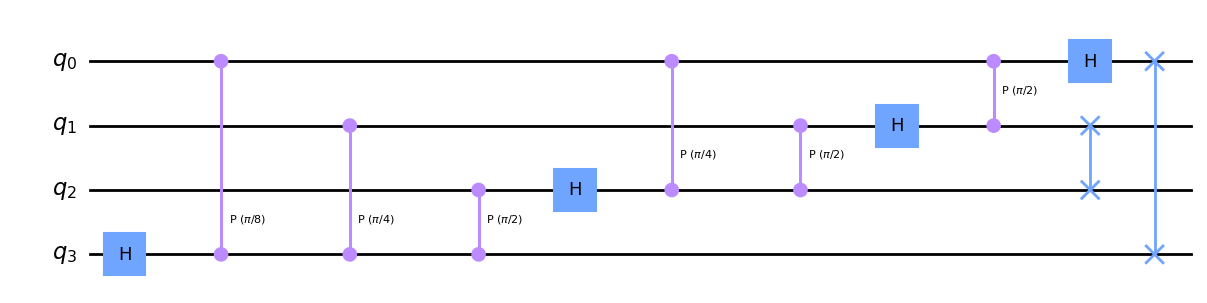

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def TFC(n):
    qc = QuantumCircuit(n)    

    for j in reversed(range(n)):
        qc.h(j)
        for k in range(j):
            qc.cp(np.pi/2**(j-k), k, j)
    for j in range(n//2):
        qc.swap(j,n-j-1)

    return qc.to_gate(label='TFC')

TFC(4).definition.draw('mpl')

Programar el inverso es tan fácil como tomar el adjunto: invertir el orden de las puertas y conjugar las fases

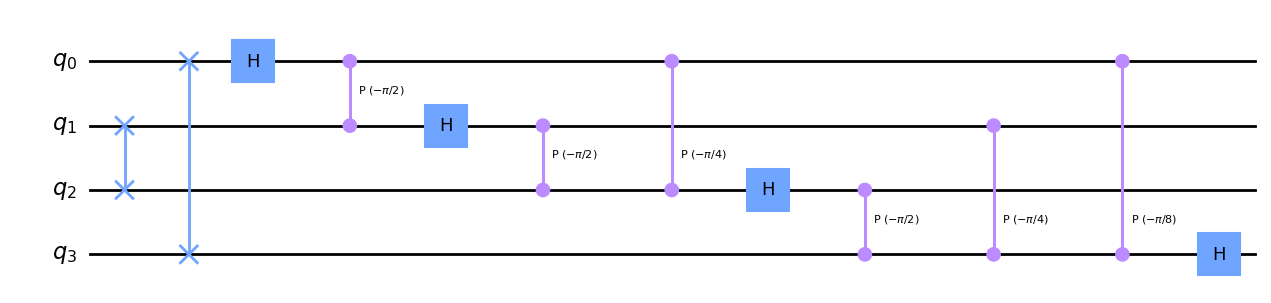

In [3]:
def TFC_adj(n):
    qc = QuantumCircuit(n)    

    for j in reversed(range(n//2)):
        qc.swap(j,n-j-1)            
    for j in range(n):
        for k in reversed(range(j)):
            qc.cp(-2*np.pi/2**(j-k+1), k, j)
        qc.h(j)

    return qc.to_gate(label='TFC_adj')

TFC_adj(4).definition.draw('mpl')

Ahora podemos inicializar un estado cualquiera  y obtener el estado TFC asociado

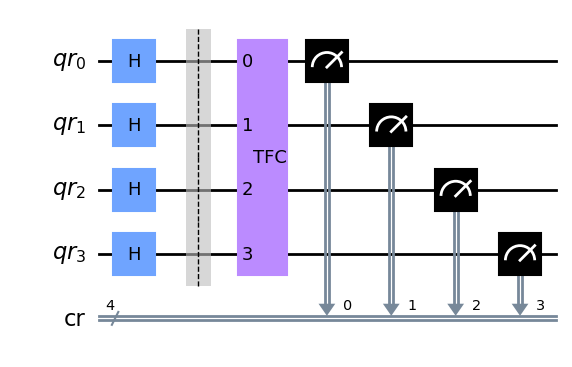

In [4]:
# Creamos el circuito 
nqubits=4
qr = QuantumRegister(nqubits,name='qr')
cr = ClassicalRegister(nqubits,name='cr')
qc = QuantumCircuit(qr,cr,name="QFT")

'Inicialización'
#qc.rx(np.pi/3,0)
#qc.cx(0,2)
#qc.x(3)
qc.h(qr)

qc.barrier()
        
'añadimos la TFC'
qc.append(TFC(nqubits),qr[:])
qc.measure(qr,cr)
qc.draw(output='mpl')

Ahora se puede variar el estado de entrada y observar el resultado a la salida. 
Por ejemplo la TFC del estado superposición  uniforme  $\ket{+\ldots+}= \frac{1}{\sqrt{N}}\sum_{i} \ket{i}$ es el estado $|0 \ldots 0>$ y viceversa



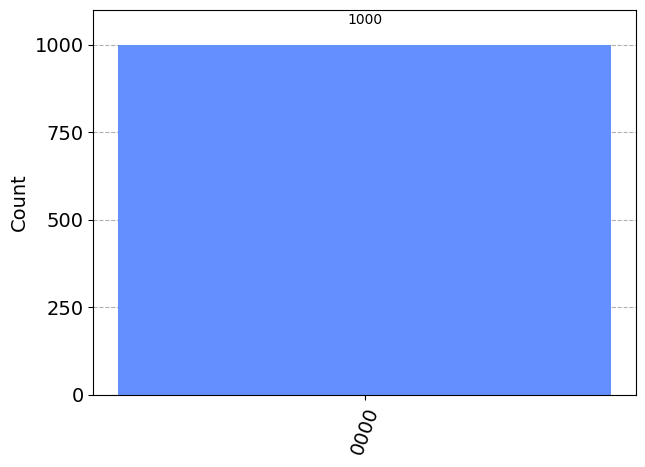

In [5]:
from qiskit.primitives import Sampler
sampler = Sampler()
from qiskit.visualization import plot_histogram, plot_bloch_multivector

nshots = 1000
dist = sampler.run(qc,shots=nshots).result().quasi_dists[0]
counts = tQ.dist2counts(dist,nqubits,nshots)

plot_histogram(counts)

###  Ventaja exponencial

Clásicamente, el algoritmo más eficiente para calcular la Transformada de Fourier Discreta (TFD) precisa de ${\cal O}(n 2^n)$ puertas lógicas.
    
 El número de puertas cuánticas que hemos necesitado es: $n$ puertas de Hadamard  $+ \, n(n-1)/2$ fases controladas $\cg{R}$. En total este un número crece como  ${\cal O}(n^2)$. 

Por tanto la TFC transforma un problema de tipo  $NP$ en uno de tipo $P$


::::::{admonition} Nota
:class: note


La TFC no es una TFD: del estado final no podemos deducir las fases  que constituyen las componentes transformadas. 
Esto es lo usual en computación cuántica: tenemos el estado, pero no podemos interrogarlo 


Ya sabemos lo que hay que hacer. El punto estará en <b>buscar problemas</b> en los que la TFC sea un ingrediente interno del cálculo que aporte una ventaja exponencial. Vamos a ver un caso paradigmático 
::::::


## Búsqueda de un período

Una aplicación directa de la transformada de Fourier cuántica tiene que ver con funciones $f: S_n \to S_{m}$ y periódicas


**Promesa:** $f: S_n \to S_{m}$ es suprayectiva con un sólo período $f(x+P) = f(x)$. 

**Problema**:  encontrar $P$ con un numero mínimo de consultas al oráculo.


-  Para realizar los cálculos exactos supondremos que $~P~$ divide  a $N=2^n$. **Existe** por tanto un entero $L$  tal que  $ LP = N$.

-  El requisito de divisibilidad se puede relajar, es decir, basta con que  $N-L < LP  \leq N = 2^n $. Esta posibilidad sólo la analizaremos numéricamente.


::::::{admonition} Nota
:class: note


Notar la diferencia con el algoritmo de Simon, donde la funcion $f:S_n\to S_n$ es bivaluada en el sentido de que $f(x) = f(x\oplus s)$ donde la suma se entiende bit a bit, módulo 2. Aquí $x+P$ es una suma numérica (en cualquier base) de los números $x$ y $P$. 

    
Clásicamente necesitaríamos evaluar $f$ un número exponencial de veces $\sim N/2 = 2^n/2$ para discernir entre las dos ultimas posibilidades $P=N/2$ de $P=N$.
::::::





::::{figure} ./figuras/Period_finding.png
:width: 800px
:align: center
::::



Comencemos analizando el algoritmos como si se tratase del problema de Simon

\begin{eqnarray*}
\ket{0}_n  \ket{0}_m ~\to ~U_f (W_n\otimes I) \ket{0}_n  \ket{0}_m  
&=& \rule{0mm}{8mm}U_f   \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \ket{x}_n\ket{0}_m \nonumber\\ \rule{0mm}{15mm}
&=&   \rule{0mm}{7mm} \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \ket{x}_n\ket{f(x)}_m \rule{0mm}{15mm}
\end{eqnarray*}


Veamos el caso $N/P\in {\mathbb Z}$, es decir, $P$ divide a $N$ en un número  entero  de tramos $L=N/P$.

Rescribamos el entero $x\in S_n$ en la forma siguiente: $~ x = lP +p~ = 0,\ldots, N-1$, donde $~p=0,\ldots,P-1~$ y $~l=0,\ldots,L-1~$. El estado se representará en la forma


\begin{eqnarray*}
 \rule{0mm}{7mm} \frac{1}{\sqrt{N}}  \sum_{p=0}^{P-1}\sum_{l=0}^{L-1}\ket{lP + p}\ket{f(lP+p)} = \rule{0mm}{7mm}  \frac{1}{\sqrt{N}} \sum_{p=0}^{P-1}\left(\sum_{l=0}^{L-1}\ket{lP + p}\right)\ket{f(p)} 
\end{eqnarray*}



donde la última igualdad se sigue aplicando la condición de periodicidad de $f$. 

Debido a esta propiedad, 
si una evaluación del segundo registro da como resultado $\ket{f(p_0)}$, el estado al que colapse el primer
registro es  una superposición normalizada 

$$
\ket{\Psi} = \frac{1}{\sqrt{L}}  \sum_{l=0}^{L-1}\ket{ lP + p_0}\, .
$$

En este punto, en el algoritmo de Simon, volveríamos a aplicar la puerta $W_n$ para conseguir una interferencia constructiva. En este caso, al tratarse de una periodicidad numérica, no bit a bit, efectuaremos sobre el estado  una transformación de Fourier cuántica, usando que $N/P = M$

\begin{eqnarray}
\ket{\Psi'} = U_{\rm TFC} \ket{\Psi} &=& \frac{1}{\sqrt{N M}} \sum_{y=0}^{N-1}   \sum_{l=0}^{L-1}e^{+2\pi i (p_0 + lP)y/N}\ket{y} \nonumber\\ \rule{0mm}{12mm}
&=& \frac{1}{\sqrt{N L}} \sum_{y=0}^{N-1}   e^{+2\pi i p_0 y/N} \left( \sum_{l=0}^{L-1} e^{+2\pi i ly/L}\right) \ket{y}  \\ \rule{0mm}{15mm}
 &=& \frac{1}{\sqrt{N L}} \sum_{y=0}^{N-1}   e^{+2\pi i p_0 y/N}  \left( \rule{0mm}{3.5mm} L \delta_{y, sL}\right) \ket{y} \nonumber\\ \rule{0mm}{15mm}
&=& \sqrt{ \frac{L}{N}}  ~ \sum_{s=0}^{P-1} e^{+2\pi i p_0 s L/N}    \ket{s L}  \nonumber\\ 
\rule{0mm}{15mm}
&=&\sqrt{ \frac{1}{P} }~ \sum_{s=0}^{P-1} e^{+2\pi i p_0 s/P }    \ket{sN/P}  
\end{eqnarray}



El **resultado** es una *superposición homogénea* de estados $~\ket{y_s = sN/P}~$ con $s=0,1,...P-1$. Al medir encontraremos las siguientes probabilidades:

$$
P(y) = \left\{ \begin{array}{cl} 1/P & \hbox{si} ~ y = s N/P \in [ 0, N/P, 2N/P,..., (P-1)N/P ] \\ 0 & \rule{0mm}{15mm}\hbox{si} ~ y \neq s N/P \end{array} \right.
$$




La estrategia ahora es medir un número suficiente de veces, que permita obtener la lista completa 

$$\{y_s\} = \{0, N/P, 2N/P,...\}$$ 

Dividiendo por $N$ obtenemos otra lista 

$$\{\varphi_s\} = \{0,1/P,2/P,...,\}$$

La extracción de $P$ a partir de elementos de esta lista se puede efectuar de distintas formas. La más sencilla es evaluar la diferencia entre elementos sucesivos de la lista e invertir. También se puede hacer mediante la descomposición en *fracciones continuas*


::::::{admonition} Nota
:class: note


El conjunto de estados $\ket{sN/P}$ es independiente de la medida $p_0$. Por tanto, podemos evitar la medida intermedia. Es el mismo efecto que vimos al estudiar el algoritmo de Simon.
::::::


### Ejemplo:

Primero vamos a fabricar el oráculo asociado auna función $f: S_n \to S_{m}$  periódica con un período $P$ que se repita $L$ veces, de modo que $L$ = int$(N/P)$. Necesitaremos  dos registros, para implementar el operador unitario asociado

$$ 
U_f :\ket{x}_n\ket{0}_m ~~\to ~~\ket{x}_n\ket{f(x)}_m
$$


valores de f(x) en un período : [1 0 4 5]


/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


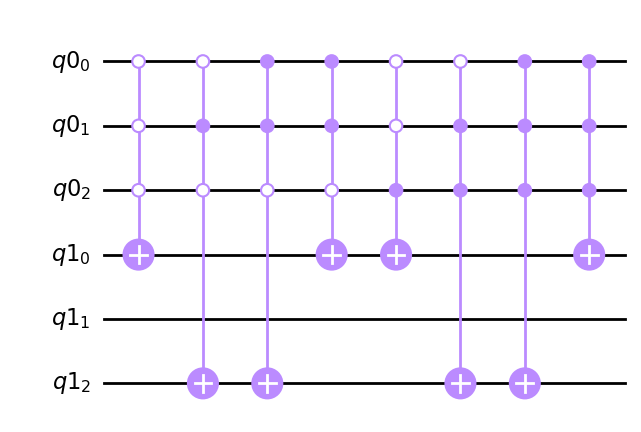

In [6]:
def periodic_oracle(Nn,Nm,P,show_values=True):

    L= int(Nn/P)
    'seleccionamos P valores aleatorios entre 1 y Nm'
    values= np.random.choice(Nm-1,P,replace=False)  
    if show_values:
        print('valores de f(x) en un período :',values)
    
    fout=np.zeros(Nn)
    for m in range(L+1):
        for p in range(P):  
            if p + m*P < Nn:
                fout[p + m*P] = values[p]
#    print('tabla binaria de verdad completa de la función f(x):',  fout)
    fout_list = [format(int(i), 'b').zfill(int(np.ceil(np.log2(np.max(fout)+2)))) for i in fout]

    return tQ.binary_function(fout_list)  

periodic_oracle(8,8,4).draw('mpl')

In [7]:
def period_finder(oracle):

    'el número de cúbits se obtiene del oráculo'
    n = int(oracle.num_qubits/2)

    qr_in = QuantumRegister(n, name='x')
    qr_out = QuantumRegister(n, name='f(x)')
    cr_in = ClassicalRegister(n, name='meas_in')
#    cr_out = ClassicalRegister(n, name='meas_out')
    qc = QuantumCircuit(qr_in, qr_out, cr_in, name='q')
    

    'aplicamos la puerta de Walsh-Hadamard al primer registro'
    qc.h(qr_in)
    'añadimos el oráculo'
    qc.append(oracle.to_gate(),qr_in[:] + qr_out[:])    
    qc.barrier()

    'medimos el registro de los cúbits de |f(x)>, este paso se puede evitar ¡compruebalo!'
#    qc.measure(qr_out, cr_out)
#    qc.barrier()
    'aplicamos la Transformada de Fourier al primer registro'
    qc.append(TFC(n),qr_in)
    
    'Finalmente medimos el registro de los inputs |x>'
    qc.measure(qr_in, cr_in)   
    return qc

#period_finder(periodic_oracle(8,8,4)).draw('mpl')

Vamos a estudiar  el caso
$ n=m=7~\to~N=2^7 ~,~ P = 4 ~~~\hbox{  es decir  } ~~~ N/P = 32 \in {\mathbb Z} $
en el que   $L = 32$.

Es decir, esta función tiene un número entero de  repeticiones de un ciclo de $P=4$ elementos


N = 2^n = 128  P = 4  L = 32.0
valores de f(x) en un período : [24 97 93 48]


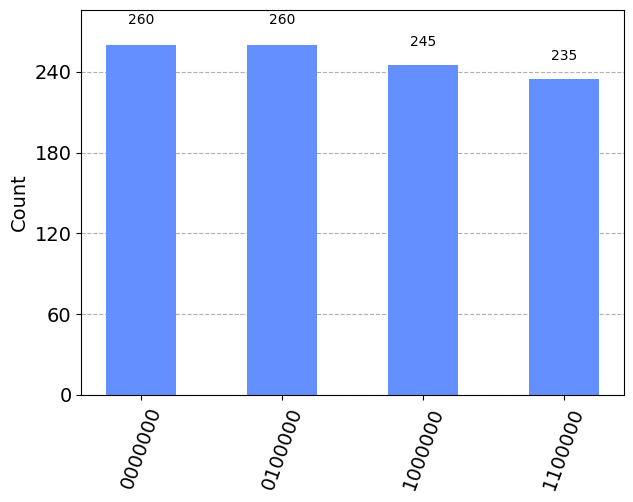

In [8]:
n = 7
m = n
Nn = 2**n
Nm = 2**m
P = 4
print('N = 2^n =',Nn, ' P =', P, ' L =', Nn/P)

'ejecutamos el circuito'
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, plot_bloch_multivector
nshots = 1000
dist = Sampler().run(period_finder(periodic_oracle(Nn,Nm,P)),shots=nshots).result().quasi_dists[0]
counts = tQ.dist2counts(dist,n,nshots)

plot_histogram(counts)

Ahora procedemos de la siguiente manera:

- seleccionamos los eventos más probables de la lista de cuentas. Filtraremos  las salidas que superen un umbral de probabilidad (o sea, de número de eventos)

( Cuando $N/p \notin {\mathbb Z} $, hay que ajustar el umbral para seleccionar los eventos más probables)

- Obtenemos la lista de valores enteros $\{N_s\}$ que  forman la mejor aproximación a $\{s N/P\}$

-  Dividiendo por $N$, obtendremos la lista $\{\varphi_s\}\in [0,1)$ que mejor aproximan los valores que buscamos $\{s/P\}~, s=1,2,..$.

-  La última parte del post-procesado consiste en averiguar qué par de números enteros, $s$ y $P$ se esconden detrás de la lista $\{\varphi_s\}$ encontrada. 


In [9]:
filtered_counts = {k: v for k, v in counts.items() if v>100 }
print(filtered_counts)
#plot_histogram(filtered_counts)

{'0000000': 260, '0100000': 260, '1000000': 245, '1100000': 235}


In [10]:
'extraemos las keys y las convertimos en decimal rechazando el 00...0 que siempre está'
Ns_list = sorted([int(keys,2) for  keys in list(filtered_counts.keys())[1:]])
print('{Ns} ~ ', Ns_list)

'dividiendo por N'
phis_list = [Ns_list[i]/Nn for i in range(len(Ns_list))]
print('phi_s', phis_list)

{Ns} ~  [32, 64, 96]
phi_s [0.25, 0.5, 0.75]


Extracción de $P$:

**Estrategia 1**: simplemente restando elementos sucesivos tenemos una lista 

$$
[(\varphi_{s+1} -\varphi_s)^{-1}]\sim \left[\left(\frac{s+1}{P} - \frac{s}{P}\right)^{-1} \right] =
\left[P \right] \sim   P
$$



In [11]:
P_list = [(phis_list[s+1]-phis_list[s])**(-1) for s in range(len(phis_list)-1)]

print(P_list)

print('el valor entero del promedio de P es  =', int(sum(P_list)/len(P_list)))

[4.0, 4.0]
el valor entero del promedio de P es  = 4



**Estrategia 2**:

Representar un número racional $a \in {\mathbb Q}$ como un cociente de dos enteros $a = s/P$, es algo que se puede conseguir a partir de su expresión en  [fracciones continuas](https://es.wikipedia.org/wiki/Fracci%C3%B3n_continua#:~:text=C%C3%A1lculo%20de%20una%20fracci%C3%B3n%20continua,-Consideremos%20un%20n%C3%BAmero&text=Para%20calcular%20la%20representaci%C3%B3n%20en,la%20diferencia%20y%20se%20repite) .
La clase [Fraction](https://docs.python.org/3/library/fractions.html) de python ya incorpora esta utilidad. 

In [12]:
from fractions import Fraction
[Fraction(phis_list[i]) for i in range(len(phis_list))]

[Fraction(1, 4), Fraction(1, 2), Fraction(3, 4)]

El método puede producir respuestas erróneas por dos razones:

-  que $s$ sea divisor de $P$

-  que $\varphi_s \sim s/P$. En ese caso, el método arroja dos enteros $s'/P'$ mayores que $s'>s$ y $P'>P$.

El segundo caso es el genérico cuando $N/P \notin {\mathbb Z} $ y se controla limitando el valor de $P$ en el cociente $s/P$ que debe aproximar $\varphi_s$.

In [13]:
[Fraction(phis_list[i]).limit_denominator(20) for i in range(int(len(phis_list)))]

[Fraction(1, 4), Fraction(1, 2), Fraction(3, 4)]



**En cualquier caso**:  *verificar* si un valor es *solución o no* es una tarea que clásicamente se puede realizar de forma eficiente. 

::::::{admonition} Ejercicio
:class: tip


Repite ahora con valores $N =N_n=N_m=7$ y $P=5$. Ahora $L =  N/P = 25.6 \notin {\mathbb Z}$.
    
 Observa la distribución de medidas. Ajusta el umbral para filtrar las más probables y repite el procedimiento para recuperar el valor de $P = 5$. 
::::::


::::::{admonition} Nota (Advertencia!) 
:class: note


 El algoritmo de búsqueda de un periodo permite una ventaja exponencial si no contamos la profundidad del oráculo. 

    
 Sin embargo ya hemos visto en el ejemplo anterior que la forma de construir el oráculo asociado a la función $f(x+P)=f(x)$ pasa por implementar la <i> tabla de verdad </i> de $P$ valores distintos $f(0),....,f(P-1)$. Para un $P$ de ${\cal O}(N)$ vemos que la <i>profundidad del oráculo</i> crece de forma exponencial.
   
Por tanto, la ventaja cuántica sólo existe en los casos de funciones  sea posible implementar mediante un oráculo de forma que su profundidad crezca polinómicamente con el tamaño del registro $n$.
::::::
